# EAD

Rozpoczynamy od importu danych

In [1]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


Diabetics jest zmienną objaśnianą, natomiast wszystkie pozostałe poza ID pacjenta są zmiennymi objaśniającymi

In [2]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

Sprawdzamy zbalansowanie klas. Zmienną objaśnianą umieszczamy w Data Series, a następnie zastosujmy metodę value_counts, dzięki której sprawdzimy unikalne klasy i liczbę ich wystąpień. Parametr normalized ustawiamy na TRUE, aby otrzymać strukturę procentową klas. 

In [3]:
pd.Series(y).value_counts(normalize=True)

0    0.666667
1    0.333333
Name: Diabetic, dtype: float64

1/3 badanych osób była cukrzykami. Tworząc model należy pamiętać, że dokładność klasyfikacji jako nie-cukrzyków będzie na poziomie 2/3. Sprawdzamy teraz, czy w modelu są brakujące dane.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


Braki danych nie występują. Sprawdzimy teraz rozkłady za pomocą metody describe

In [5]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


Teraz będziemy porównywać zmienne numeryczne X do zmiennej kategorycznej y. W tym przypadku dobrym pomysłem jest wykorzystanie wykresów pudełkowych (boxplot) 

Unique values: 15


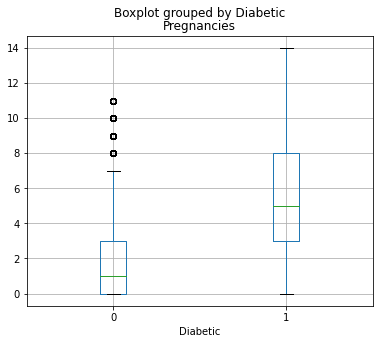

Unique values: 149


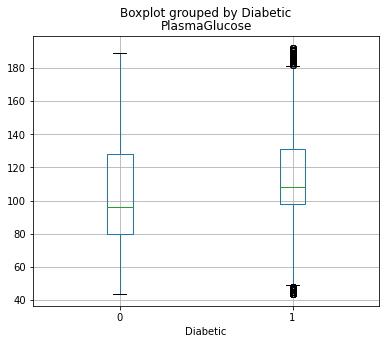

Unique values: 90


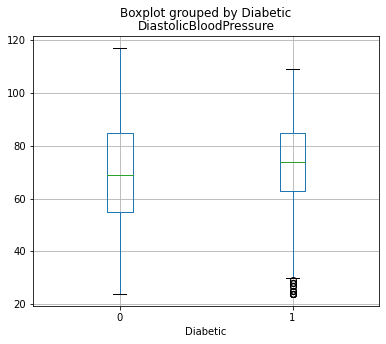

Unique values: 69


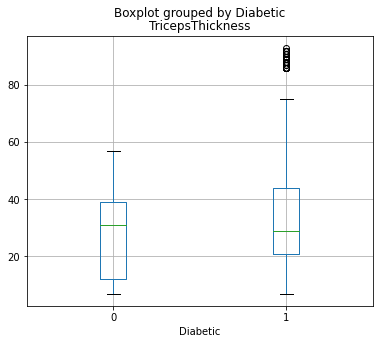

Unique values: 663


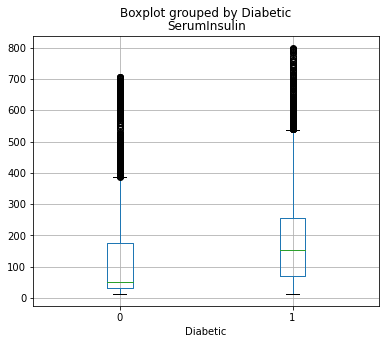

Unique values: 15000


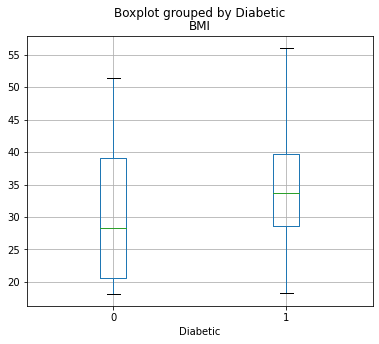

Unique values: 14999


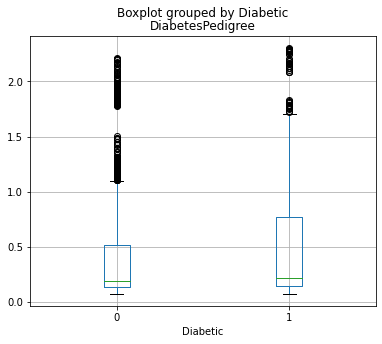

Unique values: 56


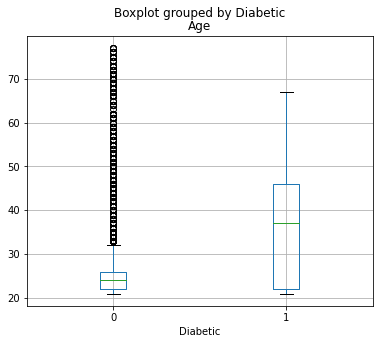

In [6]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

Inną wizualizacją, która pozwoli nam ocenić czy dana zmienna wpływa na to, czy ktoś jest cukrzykiem, są histogramy w zależności od naszej zmiennej objaśnianej.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


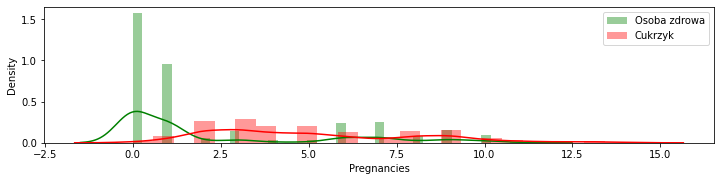

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


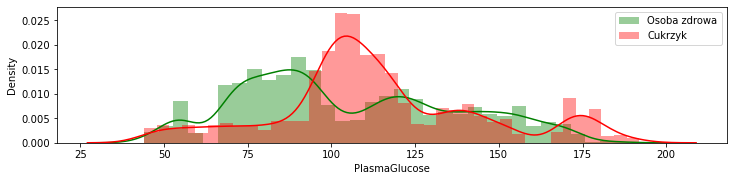

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


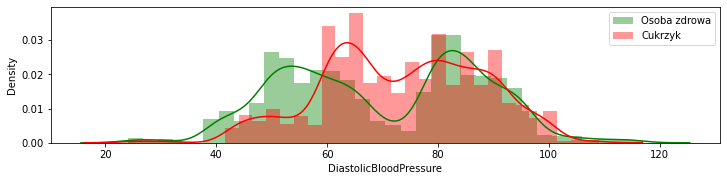

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


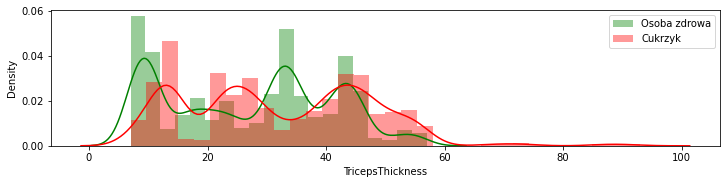

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


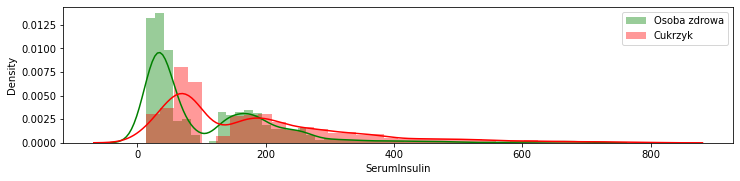

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


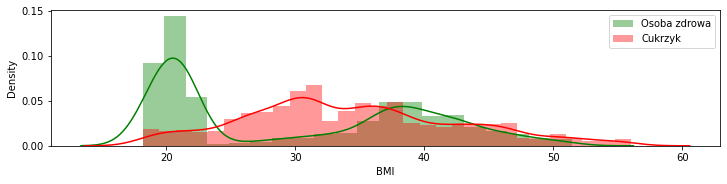

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


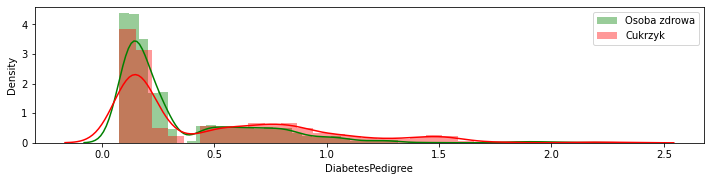

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


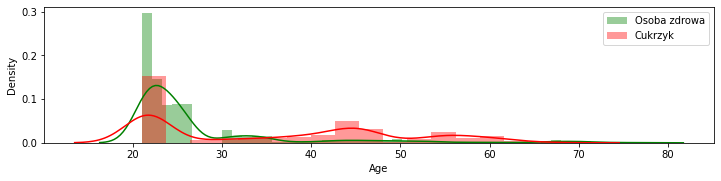

In [7]:
import seaborn as sns
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, rug=False, color='green', label='Osoba zdrowa')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, rug=False, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

W pewnych przypadkach dwie cechy przekazują tę samą informację. Sprawdźmy to również dla tego problemu.

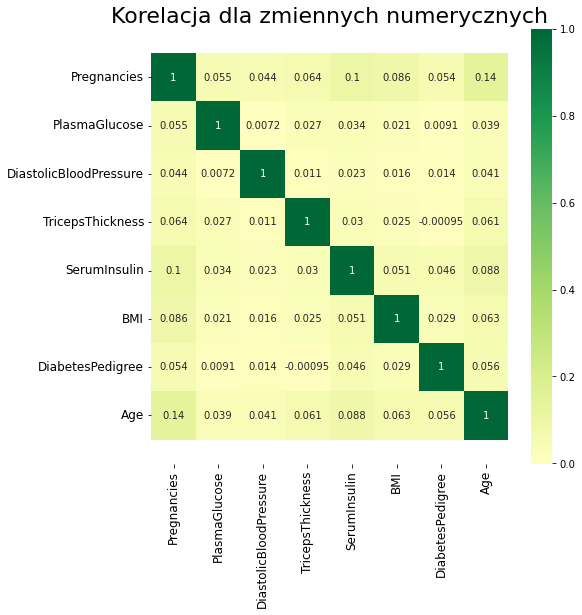

In [8]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Nie liczymy korelacji Pearsona pomiędzy zmiennymi objaśniającymi a zmienną objaśnianą. Nie możemy tego zrobić, ponieważ y to zmienna kategoryczna. . Aby policzyć korelację pomiędzy zmienną numeryczną a kategoryczną zastosować możemy współczynnik korelacji punktowo-dwuseryjnej (Point-biserial correlation coefficient). Skorzystajmy z biblioteki scipy.

In [9]:
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

Potwierdzamy już wcześniej wyciągnięte wnioski, a zatem cukrzyca najbardziej zależna jest od ciąży oraz wieku. Pozostało nam podzielić dane na treningowe oraz testowe. Najpierw zajmijmy się klasyfikacją na podstawie przed chwilą przywołanych dwóch cech. Skorzystajmy z parametru stratify i przypiszmy tam y, dzięki czemu oba zbiory zawierać będą przybliżony ten sam procent próbek z każdej klasy.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


##  Regresja logistyczna 

Regresja logistyczna jest modelem parametrycznym, a zatem zmienne powinny być w tej samej skali. Zanim nauczymy model to stwórzmy nowy wystandaryzowany X dla zbioru treningowego oraz testowego w oparciu o średnią i odchylenie ze zbioru treningowego.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

Wizualizacja działania klasyfikatora

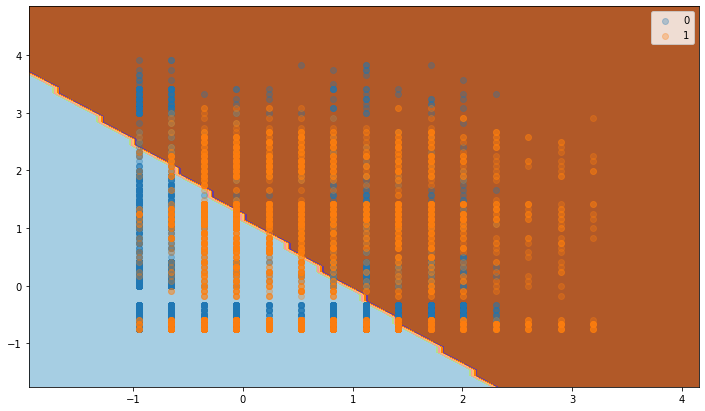

In [13]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

# Ocena modelu

Zbudujemy macierz pomyłek

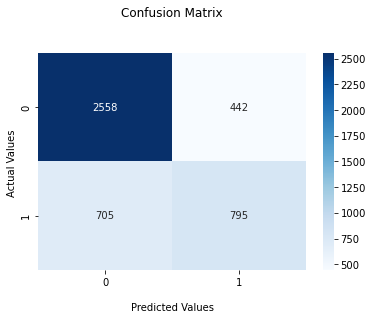

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr = model_lr.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

Policzmy dokładność, precyzję, czułość oraz F1 score.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


Sporządzimy teraz wykresy krzywej ROC (Receiver Operating Characteristic) i pochodnej temu wykresowi metryki AUC (Area Under the Curve). Modele klasyfikacji mogą zwracać prawdopodobieństwo i to wykorzystuje krzywa ROC. Standardowo modele klasyfikacji mają punkt odcięcia na 0.5, tj. jeśli prawdopodobieństwo jest wyższe niż ten punkt odcięcia to klasa jest pozytywna, w przeciwnym razie negatywna. Możemy się zastanowić jak zmienią się wyniki w zależności od punktu odcięcia. Zdarzyć się może, że metryka precyzji jest dla nas niewystarczająca, nie musimy uczyć nowego modelu, aby maksymalizować tą metrykę, wystarczy manipulować punktem odcięcia!

AUC jest to pole znajdujące się pod krzywą ROC, zaś sama krzywa ROC to wykres TPR (True Positives Rate – tzw. czułość) oraz FPR (False Positives Rate – tzw. specyficzność) w zależności od punktu odcięcia. Najlepszym modelem jest ten, który jest najbliżej lewego górnego rogu wykresu, czyli dążymy do TPR równego 1 i FPR równego 0. Krzywa ROC przechodząca przez przekątną jest odzwierciedleniem modelu losowego dla danych zbalansowanych – model wtedy jest tak samo użyteczny co rzut monetą.

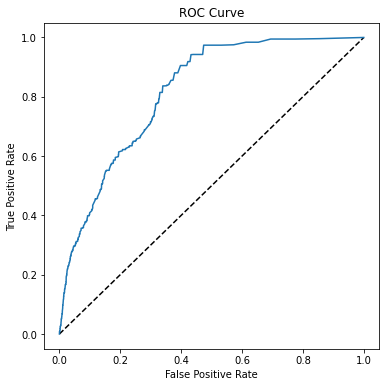

AUC: 0.8164931111111111


In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

Stworzymy funkcję, która oblicza najważniejsze metryki oraz rysuje wykresy. Tę funkcję wykorzystywać będziemy przy ocenie następnych modeli, zatem warto zapisywać najważniejsze metryki (np. f1-score czy AUC) poprzednich modeli, w celu porównawczym

In [17]:
from sklearn.metrics import classification_report

metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},
                                                 ignore_index=True)
    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



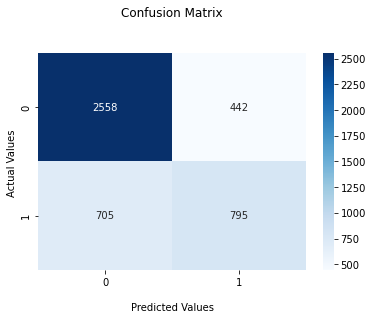

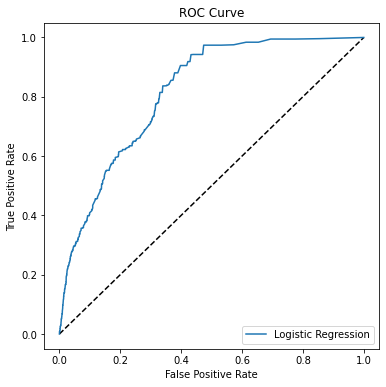

C:\Users\zfech\AppData\Local\Temp\ipykernel_16220\383110356.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_dataframe = metrics_dataframe.append({'Model': name, 'F1_score': f1_metric, 'AUC': auc_metric},


,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [18]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

# Regularyzacja regresja logistyczna

W tej części wykorzystamy następujące źródła:
   + https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
   + https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
   + https://www.kaggle.com/code/funxexcel/p2-logistic-regression-hyperparameter-tuning
    

Treść polecenia: Poznaliśmy już pierwszy model dla regresji logistycznej, teraz sprawdź jak zachowuje się model dla różnych regularyzacji i ich stopnia. Zwizualizuj działanie modelu z wykorzystaniem funkcji plot_classification_surface oraz za każdym razem oblicz F1_score na zbiorze treningowym oraz testowym (zobaczysz czy model przypadkiem się nie przeucza).

Sprawdzimy najpierw parametr l1. W tej sytuacji musimy zmienić domyślny solver, wybieramy 'liblinear'

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr_l1 = LogisticRegression(penalty='l1',solver = 'liblinear' )
model_lr_l1.fit(X_train_standardized, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

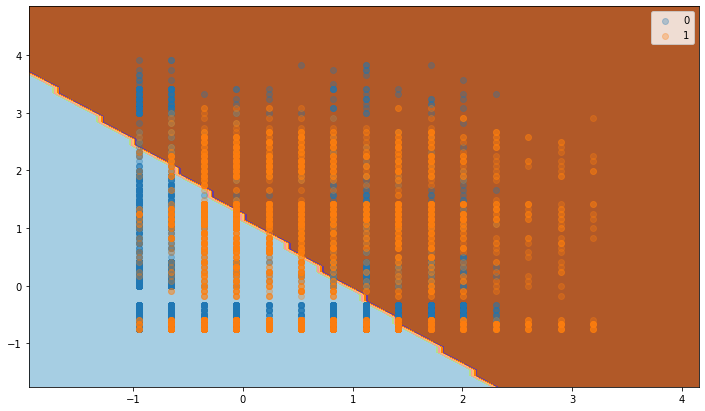

In [20]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l1)

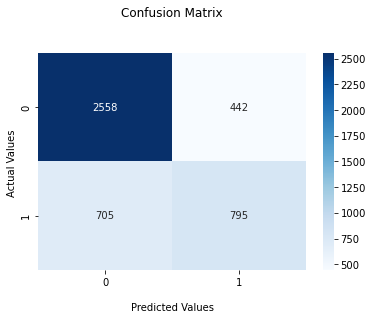

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr_l1 = model_lr_l1.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_l1)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [22]:
print("F1_score:", f1_score(y_test, predictions_lr_l1))

F1_score: 0.5809280233832663


Wynik F1 jest taki sam jak dla ustawień domyślnych hiperparametrów, podobnie jak macierz pomyłek.

Wybierzemy teraz parametr penalty = "none"

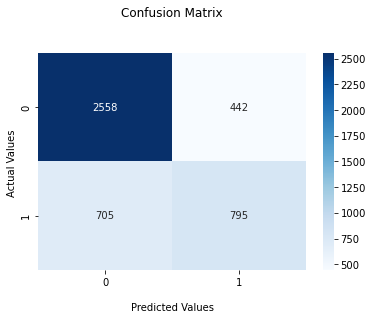

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr_none = LogisticRegression(penalty='none')
model_lr_none.fit(X_train_standardized, y_train)
predictions_lr_none = model_lr_none.predict(X_test_standardized)

from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr_none = model_lr_none.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_none)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [27]:
print("F1_score:", f1_score(y_test, predictions_lr_none))

F1_score: 0.5809280233832663


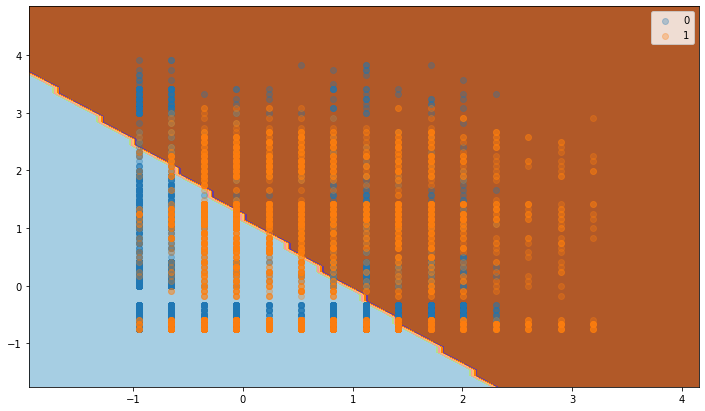

In [28]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)

Otrzymujemy podobne wnioski: wynik F1 jest taki sam jak dla ustawień domyślnych hiperparametrów, podobnie jak macierz pomyłek.

Zautomatyzujmy teraz nasze wyszukanie.

In [29]:
import numpy as np
param_grid = [    
    {'penalty' : ['l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
logModel = LogisticRegression()
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [32]:
scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)

In [33]:
best_clf = clf.fit(X_train_standardized,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


Wyświetlimy najlepszy zestaw hiperparametrów:

In [41]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212)

In [42]:
print (f'Accuracy - : {best_clf.score(X_train_standardized,y_train):.3f}')

Accuracy - : 0.735


Widać, że hiperparametr C ma wpływ na ewentualne zmiany wyników dopadowania. Przyjrzymy sie kilku przypadkom. Rozpoczniemy od C=0.1.

In [40]:
model_lr_C_01 = LogisticRegression(C=0.1)
model_lr_C_01.fit(X_train_standardized, y_train)

LogisticRegression(C=0.1)

In [41]:
predictions_lr_C_01 = model_lr_C_01.predict(X_test_standardized)
print("F1_score:", f1_score(y_test, predictions_lr_C_01))

F1_score: 0.5772893772893773


In [42]:
print("Accuracy:", accuracy_score(y_test, predictions_lr_C_01))

Accuracy: 0.7435555555555555


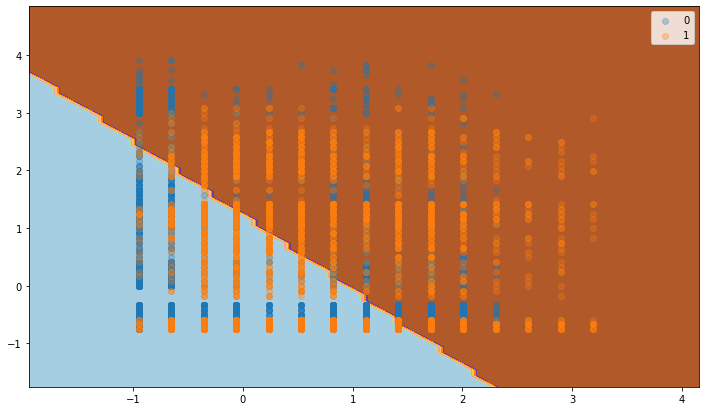

In [43]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_C_01)

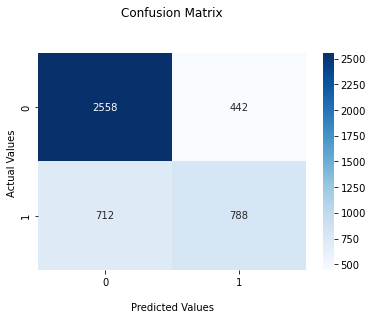

In [44]:
predictions_lr_C_01 = model_lr_C_01.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_C_01)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

Teraz otrzymaliśmy inny wynik dokładności i f1 a także inną macierz pomyłek. 

In [46]:
model_lr_C_05 = LogisticRegression(C=0.5)
model_lr_C_05.fit(X_train_standardized, y_train)

LogisticRegression(C=0.5)

In [47]:
predictions_lr_C_05 = model_lr_C_05.predict(X_test_standardized)
print("F1_score:", f1_score(y_test, predictions_lr_C_05))

F1_score: 0.5809280233832663


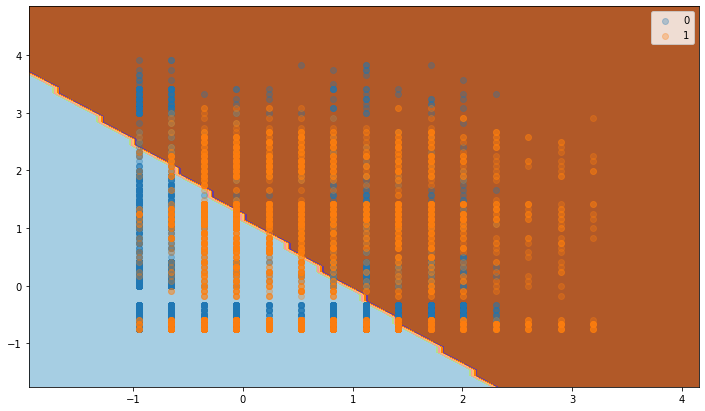

In [48]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_C_05)

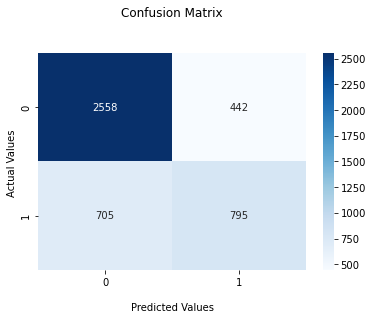

In [49]:
predictions_lr_C_05 = model_lr_C_05.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_C_05)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

Popatrzmy teraz na przypadek C=0.25

In [53]:
model_lr_C_25 = LogisticRegression(C=0.25)
model_lr_C_25.fit(X_train_standardized, y_train)
predictions_lr_C_25= model_lr_C_25.predict(X_test_standardized)
print("F1_score:", f1_score(y_test, predictions_lr_C_25))

F1_score: 0.5772893772893773


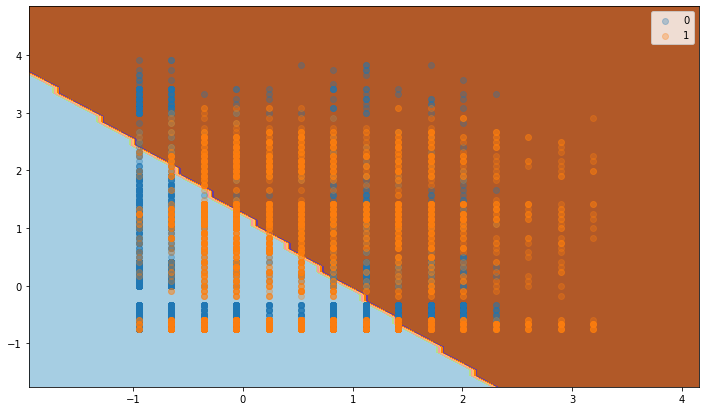

In [54]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_C_25)

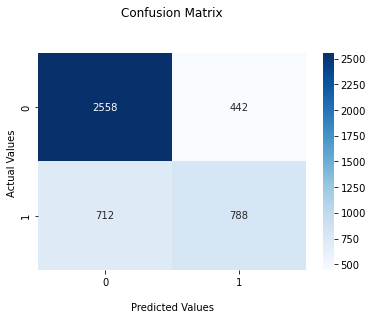

In [55]:
predictions_lr_C_25 = model_lr_C_25.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_C_25)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

Popatrzmy teraz na przypadek C=2

In [57]:
model_lr_C_2 = LogisticRegression(C=2)
model_lr_C_2.fit(X_train_standardized, y_train)
predictions_lr_C_2= model_lr_C_2.predict(X_test_standardized)
print("F1_score:", f1_score(y_test, predictions_lr_C_2))

F1_score: 0.5809280233832663


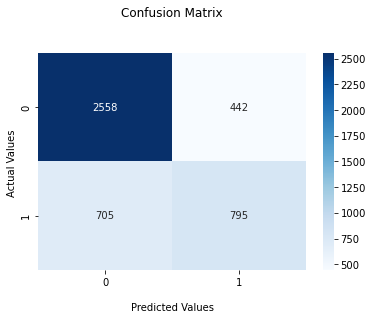

In [58]:
predictions_lr_C_2 = model_lr_C_2.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_C_2)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

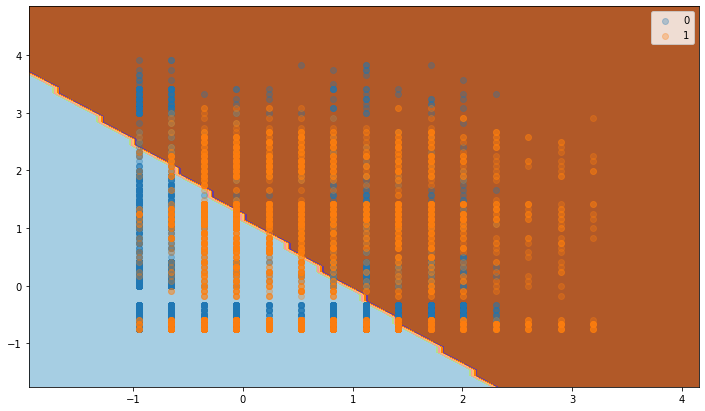

In [59]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_C_2)

In [60]:
model_lr_C_001 = LogisticRegression(C=0.01)
model_lr_C_001.fit(X_train_standardized, y_train)
predictions_lr_C_001= model_lr_C_001.predict(X_test_standardized)
print("F1_score:", f1_score(y_test, predictions_lr_C_001))

F1_score: 0.5674972108590555


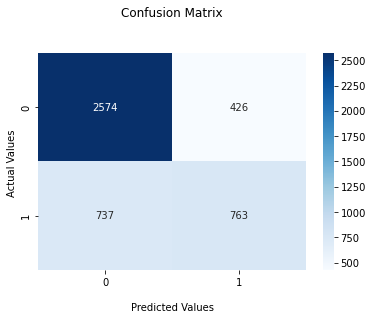

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_lr_C_001 = model_lr_C_001.predict(X_test_standardized)
cm = confusion_matrix(y_test, predictions_lr_C_001)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

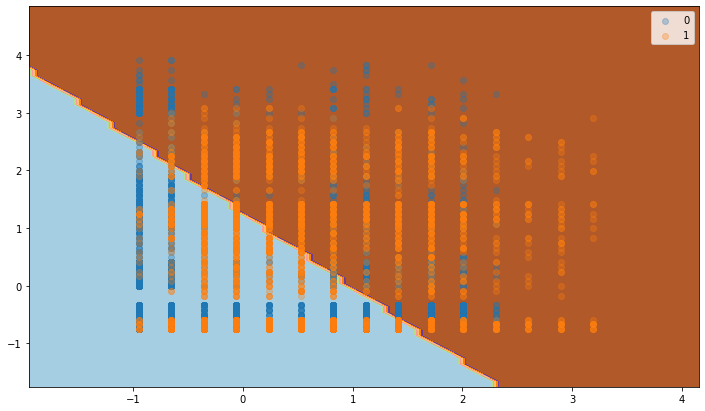

In [63]:
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_C_001)

Wniosek: w przypadku regresji logistycznej w badanym zbiorze danych nie występują istotne różnice w wydajności modelu. 